In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, RMSprop

In [3]:
train = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [4]:
train.head(3)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head(3)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


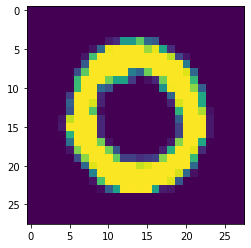

In [6]:
X = train.drop('label', axis = 1)
y = train['label']
X = X.values.reshape(-1, 28, 28, 1)
X = X / 255
y = to_categorical(y)
plt.imshow(X[1][:,:,0])
print(str(y[1]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [8]:
datagen = ImageDataGenerator(zoom_range = 0.1, width_shift_range = 0.1, height_shift_range = 0.1, rotation_range = 10) 

In [9]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(strides = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [10]:
model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'categorical_crossentropy')

In [11]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)
#annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [12]:
hist = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 16), epochs = 20, validation_data = (X_test, y_test), callbacks = [learning_rate_reduction])

Epoch 1/20
2100/2100 [==============================] - 19s 9ms/step - loss: 0.3185 - accuracy: 0.9005 - val_loss: 0.0856 - val_accuracy: 0.9740 - lr: 0.0010
Epoch 2/20
2100/2100 [==============================] - 19s 9ms/step - loss: 0.1635 - accuracy: 0.9537 - val_loss: 0.0549 - val_accuracy: 0.9849 - lr: 0.0010
Epoch 3/20
2100/2100 [==============================] - 20s 10ms/step - loss: 0.1358 - accuracy: 0.9623 - val_loss: 0.0539 - val_accuracy: 0.9864 - lr: 0.0010
Epoch 4/20
2100/2100 [==============================] - 19s 9ms/step - loss: 0.1219 - accuracy: 0.9663 - val_loss: 0.0404 - val_accuracy: 0.9879 - lr: 0.0010
Epoch 5/20
2100/2100 [==============================] - 20s 9ms/step - loss: 0.1073 - accuracy: 0.9709 - val_loss: 0.0259 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 6/20
2100/2100 [==============================] - 20s 10ms/step - loss: 0.1008 - accuracy: 0.9729 - val_loss: 0.0609 - val_accuracy: 0.9808 - lr: 0.0010
Epoch 7/20
2100/2100 [============================

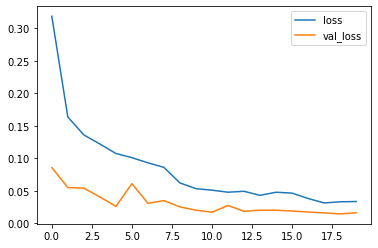

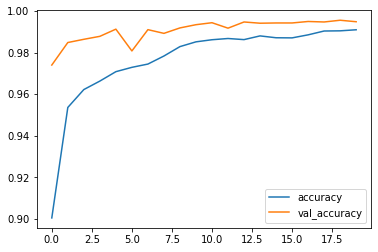

In [13]:
loss = pd.DataFrame(model.history.history)
loss[['loss', 'val_loss']].plot()
loss[['accuracy', 'val_accuracy']].plot()

In [14]:
test = test.values.reshape(-1, 28, 28, 1) / 255
y_pred = model.predict(test, batch_size = 64)

y_pred = np.argmax(y_pred,axis = 1)
y_pred = pd.Series(y_pred,name="Label")
y_pred

0        2
1        0
2        9
3        0
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [15]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)

submission.to_csv("submision_Inception.csv",index=False)
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
